<a href="https://colab.research.google.com/github/TristanLeclair/COMP551Colab/blob/main/Lin_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('ENB2012_data.xlsx')
df.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33


In [ ]:
df.tail(3)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [ ]:
df.describe(include='all')

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


# Cleanup

## Normalize Data

In [ ]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy1 = preprocessing.MinMaxScaler()
sy2 = preprocessing.MinMaxScaler()

normedDf = df.copy()

norm_X = df.iloc[:, 0:8]
norm_Y1 = df[["Y1"]]
norm_Y2 = df[["Y2"]]

norm_X = sx.fit_transform(norm_X)
norm_Y1 = sy1.fit_transform(norm_Y1)
norm_Y2 = sy2.fit_transform(norm_Y2)

normedDf = pd.concat([pd.DataFrame(norm_X), pd.DataFrame(norm_Y1), pd.DataFrame(norm_Y2)], axis=1)
normedDf.columns = df.columns
normedDf

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085
...,...,...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0,0.320032,0.282790
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0,0.283904,0.161056
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0,0.281208,0.167250
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0,0.282286,0.153784


In [ ]:
norm_X = normedDf.iloc[:, 0:8]
norm_Y1 = normedDf[["Y1"]]
norm_Y2 = normedDf[["Y2"]]

### Final dataframes

In [ ]:
norm_X

,X1,X2,X3,X4,X5,X6,X7,X8
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0


In [ ]:
norm_Y1

,Y1
0,0.257212
1,0.257212
2,0.257212
3,0.257212
4,0.399838
...,...
763,0.320032
764,0.283904
765,0.281208
766,0.282286


In [ ]:
norm_Y2

,Y2
0,0.280905
1,0.280905
2,0.280905
3,0.280905
4,0.468085
...,...
763,0.282790
764,0.161056
765,0.167250
766,0.153784


In [ ]:
normedDf.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.400463,0.534722,0.428571,0.601852,0.500000,0.500000,0.585938,0.562500,0.439396,0.368644
std,0.293826,0.299613,0.254382,0.409668,0.500326,0.372921,0.333051,0.310192,0.272046,0.256216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173611,0.312500,0.285714,0.277778,0.000000,0.250000,0.250000,0.350000,0.188258,0.127121
50%,0.361111,0.541667,0.428571,0.666667,0.500000,0.500000,0.625000,0.600000,0.348881,0.301104
75%,0.583333,0.770833,0.571429,1.000000,1.000000,0.750000,1.000000,0.800000,0.691763,0.598775
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Select K best attributes

Import method

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

Get selection scores

In [ ]:
selector_Y1 = SelectKBest(f_regression, k='all')
df_selected_Y1 = selector_Y1.fit_transform(norm_X, np.ravel(norm_Y1))
selector_Y2 = SelectKBest(f_regression, k='all')
df_selected_Y2 = selector_Y2.fit_transform(norm_X, np.ravel(norm_Y2))

### Sort k best for Y1

In [ ]:
scores_Y1 = selector_Y1.scores_[selector_Y1.get_support()]
x_names = norm_X.columns.values[selector_Y1.get_support()]
names_scores_Y1 = list(zip(x_names, scores_Y1))
ns_df_Y1 = pd.DataFrame(data=names_scores_Y1, columns=['Feat_names', 'F_scores'])
ns_df_sorted_Y1 = ns_df_Y1.sort_values(['F_scores', 'Feat_names'], ascending=[False, True])
ns_df_sorted_Y1

,Feat_names,F_scores
4,X5,2900.590178
3,X4,2211.620312
1,X2,585.260349
0,X1,484.045616
2,X3,200.727893
6,X7,60.156178
7,X8,5.892043
5,X6,0.005126


In [ ]:
k_best_cols_Y1 = ns_df_sorted_Y1.head(4).iloc[:,0].values
X_best_Y1 = norm_X[k_best_cols_Y1]
X_best_Y1

,X5,X4,X2,X1
0,1.0,0.000000,0.000000,1.000000
1,1.0,0.000000,0.000000,1.000000
2,1.0,0.000000,0.000000,1.000000
3,1.0,0.000000,0.000000,1.000000
4,1.0,0.111111,0.166667,0.777778
...,...,...,...,...
763,0.0,1.000000,0.916667,0.055556
764,0.0,1.000000,1.000000,0.000000
765,0.0,1.000000,1.000000,0.000000
766,0.0,1.000000,1.000000,0.000000


In [ ]:
df_k_best_Y1 = pd.concat([X_best_Y1, norm_Y1], axis=1)
df_k_best_Y1

,X5,X4,X2,X1,Y1
0,1.0,0.000000,0.000000,1.000000,0.257212
1,1.0,0.000000,0.000000,1.000000,0.257212
2,1.0,0.000000,0.000000,1.000000,0.257212
3,1.0,0.000000,0.000000,1.000000,0.257212
4,1.0,0.111111,0.166667,0.777778,0.399838
...,...,...,...,...,...
763,0.0,1.000000,0.916667,0.055556,0.320032
764,0.0,1.000000,1.000000,0.000000,0.283904
765,0.0,1.000000,1.000000,0.000000,0.281208
766,0.0,1.000000,1.000000,0.000000,0.282286


### Sort k best for Y2

In [ ]:
scores_Y2 = selector_Y2.scores_[selector_Y2.get_support()]
x_names = norm_X.columns.values[selector_Y2.get_support()]
names_scores_Y2 = list(zip(x_names, scores_Y2))
ns_df_Y2 = pd.DataFrame(data=names_scores_Y2, columns=['Feat_names', 'F_scores'])
ns_df_sorted_Y2 = ns_df_Y2.sort_values(['F_scores', 'Feat_names'], ascending=[False, True])
ns_df_sorted_Y2

,Feat_names,F_scores
4,X5,3111.127823
3,X4,2226.031391
1,X2,634.180214
0,X1,515.763924
2,X3,170.921606
6,X7,34.466755
7,X8,1.960440
5,X6,0.156443


In [ ]:
k_best_cols_Y2 = ns_df_sorted_Y2.head(4).iloc[:,0].values
X_best_Y2 = norm_X[k_best_cols_Y2]
X_best_Y2

,X5,X4,X2,X1
0,1.0,0.000000,0.000000,1.000000
1,1.0,0.000000,0.000000,1.000000
2,1.0,0.000000,0.000000,1.000000
3,1.0,0.000000,0.000000,1.000000
4,1.0,0.111111,0.166667,0.777778
...,...,...,...,...
763,0.0,1.000000,0.916667,0.055556
764,0.0,1.000000,1.000000,0.000000
765,0.0,1.000000,1.000000,0.000000
766,0.0,1.000000,1.000000,0.000000


In [ ]:
df_k_best_Y2 = pd.concat([X_best_Y2, norm_Y2], axis=1)
df_k_best_Y2

,X5,X4,X2,X1,Y2
0,1.0,0.000000,0.000000,1.000000,0.280905
1,1.0,0.000000,0.000000,1.000000,0.280905
2,1.0,0.000000,0.000000,1.000000,0.280905
3,1.0,0.000000,0.000000,1.000000,0.280905
4,1.0,0.111111,0.166667,0.777778,0.468085
...,...,...,...,...,...
763,0.0,1.000000,0.916667,0.055556,0.282790
764,0.0,1.000000,1.000000,0.000000,0.161056
765,0.0,1.000000,1.000000,0.000000,0.167250
766,0.0,1.000000,1.000000,0.000000,0.153784


### Results

We've now created 2 new dataFrames containing the values that best fit both `Y1` and `Y2`
Stored in `df_k_best_Y1` and `df_k_best_Y2`

## Select train and test data

In [ ]:
selectTrain = lambda df,frac,random_state : df.sample(frac=frac, random_state=random_state)

In [ ]:
trainData_raw = selectTrain(df=df,frac=0.8, random_state=26)
testData_raw = df.drop(trainData_raw.index)
trainData = selectTrain(df=normedDf,frac=0.8,random_state=26)
testData = normedDf.drop(trainData.index)
trainData_k_best_Y1 = selectTrain(df=df_k_best_Y1, frac=0.8, random_state=26)
testData_k_best_Y1 = normedDf.drop(trainData.index)
trainData_k_best_Y2 = selectTrain(df=df_k_best_Y2, frac=0.8, random_state=26)
testData_k_best_Y2 = normedDf.drop(trainData.index)

In [ ]:
print(trainData.iloc[:, 0:8].shape, trainData[["Y1"]].shape)

(614, 8) (614, 1)


In [ ]:
X = trainData.iloc[:, 0:8]
Y1 = trainData[["Y1"]]
Y2 = trainData[["Y2"]]
X_raw = trainData_raw.iloc[:, 0:8]
Y1_raw = trainData_raw[["Y1"]]
Y2_raw = trainData_raw[["Y2"]]
k_best_X_Y1 = trainData_k_best_Y1.iloc[:, 0:4]
k_best_Y1 = trainData_k_best_Y1[["Y1"]]
k_best_X_Y2 = trainData_k_best_Y2.iloc[:, 0:4]
k_best_Y2 = trainData[["Y2"]]

# Useful methods

In [ ]:
sse = lambda pred, actual: 0.5 *  np.mean((pred - actual)**2, axis=0)

# Linear Regression

## Implementation

In [ ]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
    
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        #alternatively: self.w = np.linalg.inv(x.T @ x)@x.T@y
        print(x.shape, y.shape)
        self.w = np.linalg.lstsq(x, y, rcond=-1)[0]          #return w for the least square difference
        return self
    
    def predict(self, x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh

## Run

Fit model to normalized training Data

In [ ]:
lin_Y1 = LinearRegression()
lin_Y1.fit(X, Y1)
lin_Y1.w

(614, 9) (614, 1)


array([[-6.11555297e-01],
       [-2.58776572e+12],
       [ 1.50953001e+12],
       [ 1.94082429e+12],
       [ 4.10888672e-01],
       [ 1.34277344e-03],
       [ 2.11059570e-01],
       [ 2.94189453e-02],
       [-4.31294287e+11]])

In [ ]:
lin_Y2 = LinearRegression()
lin_Y2.fit(X, Y2)
lin_Y2.w

(614, 9) (614, 1)


array([[-6.82196415e-01],
       [-9.74591835e+12],
       [ 5.68511904e+12],
       [ 7.30943876e+12],
       [ 4.15039062e-01],
       [ 5.85937500e-03],
       [ 1.62109375e-01],
       [ 6.83593750e-03],
       [-1.62431972e+12]])

### Run with raw data

In [ ]:
lin_raw_Y1 = LinearRegression()
lin_raw_Y1.fit(X_raw, Y1_raw)
lin_raw_Y1.w

(614, 9) (614, 1)


array([[-6.20558390e+01],
       [-9.20125342e+11],
       [ 9.20125342e+11],
       [ 1.84025068e+12],
       [ 4.31512833e+00],
       [ 2.80013084e-02],
       [ 1.94355443e+01],
       [ 2.35681057e-01],
       [ 7.73247000e+01]])

In [ ]:
lin_raw_Y2 = LinearRegression()
lin_raw_Y2.fit(X_raw, Y2_raw)
lin_raw_Y2.w

(614, 9) (614, 1)


array([[-6.88369325e+01],
       [-1.47403515e+12],
       [ 1.47403515e+12],
       [ 2.94807031e+12],
       [ 4.30282211e+00],
       [ 1.82914257e-01],
       [ 1.45924000e+01],
       [ 9.17072296e-02],
       [ 9.33874210e+01]])

### Run with k-best data

In [ ]:
lin_k_best_Y1 = LinearRegression()
lin_k_best_Y1.fit(k_best_X_Y1, k_best_Y1)
lin_k_best_Y1.w

(614, 5) (614, 1)


array([[ 0.41271656],
       [-0.33284617],
       [-0.32186018],
       [-0.73861923],
       [ 0.89949335]])

In [ ]:
lin_k_best_Y2 = LinearRegression()
lin_k_best_Y2.fit(k_best_X_Y2, k_best_Y2)
lin_k_best_Y2.w

(614, 5) (614, 1)


array([[ 0.41223209],
       [-0.24656407],
       [-0.44145115],
       [-0.77565024],
       [ 0.85534435]])

## Results/Testing

Test normalized

In [ ]:
errors=[]

In [ ]:
testX_Y1 = testData.iloc[:, 0:8].copy()
predictions_Y1 = lin_Y1.predict(testX_Y1)

In [ ]:
error_lin_Y1 = sse(pred=predictions_Y1, actual=testData[["Y1"]])
errors.append(('Y1',error_lin_Y1.to_string(index=False)))
error_lin_Y1.to_string(index=False)

'0.00269'

In [ ]:
testX_Y2 = testData.iloc[:, 0:8].copy()
lin_Y2_pred = lin_Y2.predict(testX_Y2)
error_lin_Y2 = sse(pred=lin_Y2_pred, actual=testData[["Y1"]])
errors.append(('Y2',error_lin_Y2.to_string(index=False)))
error_lin_Y2.to_string(index=False)

'0.005975'

Test raw

In [ ]:
testX_raw = testData_raw.iloc[:, 0:8].copy()
lin_raw_Y1_pred = lin_raw_Y1.predict(testX_raw)
error_lin_raw_Y1 = sse(pred=lin_raw_Y1_pred, actual=testData_raw[["Y1"]])
errors.append(('Y1 raw',error_lin_raw_Y1.to_string(index=False)))
error_lin_raw_Y1.to_string(index=False)

'3.729576'

In [ ]:
testX_raw = testData_raw.iloc[:, 0:8].copy()
lin_raw_Y2_pred = lin_raw_Y2.predict(testX_raw)
error_lin_raw_Y2 = sse(pred=lin_raw_Y2_pred, actual=testData_raw[["Y2"]])
errors.append(('Y2 raw',error_lin_raw_Y2.to_string(index=False)))
error_lin_raw_Y2.to_string(index=False)

'5.604829'

Test k best

In [ ]:
test_X_k_best = testData_k_best_Y1.iloc[:, 0:4].copy()
lin_k_best_Y1_pred = lin_k_best_Y1.predict(test_X_k_best)
error_lin_k_best_Y1 = sse(pred=lin_k_best_Y1_pred, actual=testData_k_best_Y1[["Y1"]])
errors.append(('Y1 k best',error_lin_k_best_Y1.to_string(index=False)))
error_lin_k_best_Y1.to_string(index=False)

'0.080057'

In [ ]:
test_X_k_best = testData_k_best_Y2.iloc[:, 0:4].copy()
lin_k_best_Y2_pred = lin_k_best_Y2.predict(test_X_k_best)
error_lin_k_best_Y2 = sse(pred=lin_k_best_Y2_pred, actual=testData_k_best_Y2[["Y2"]])
errors.append(('Y2 k best',error_lin_k_best_Y2.to_string(index=False)))
error_lin_k_best_Y2.to_string(index=False)

'0.081678'

In [ ]:
[x[1] for x in errors]

['0.00269', '0.005975', '3.729576', '5.604829', '0.080057', '0.081678']

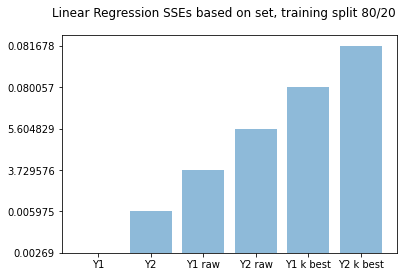

In [ ]:
y_pos = np.arange(len(errors))
plt.bar(y_pos, [x[1] for x in errors], align='center', alpha=0.5)
plt.xticks(y_pos, [x[0] for x in errors])
plt.suptitle('Linear Regression SSEs based on set, training split 80/20')
plt.show()

## Plotting

### Our implementation

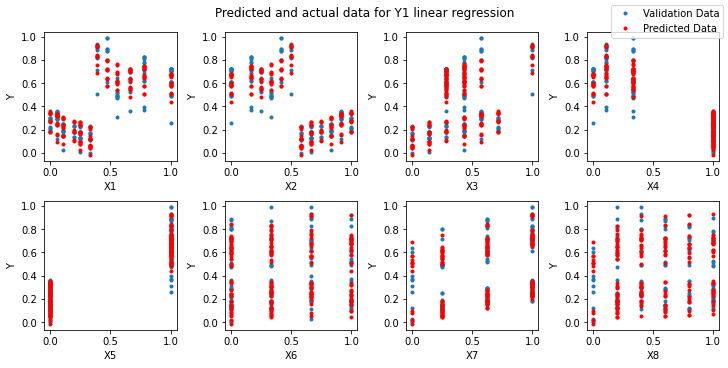

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=2, constrained_layout=True, figsize=(10,5))
slopes = lin_Y1.w[0:-1]
fig.suptitle("Predicted and actual data for Y1 linear regression")
line1 = []
line2 = []
for ax, col, slope in zip(axes.flat, testX_Y1, slopes):
    line_a, = ax.plot(testX_Y1[col], testData[["Y1"]], '.')
    line_b, = ax.plot(testX_Y1[col], predictions_Y1, '.', color='r')
    ax.set_xlabel('{axe}'.format(axe=col))
    ax.set_ylabel('Y')
fig.legend((line_a, line_b), ('Validation Data', 'Predicted Data'))
fig.savefig('pred_slopes_lin_reg')

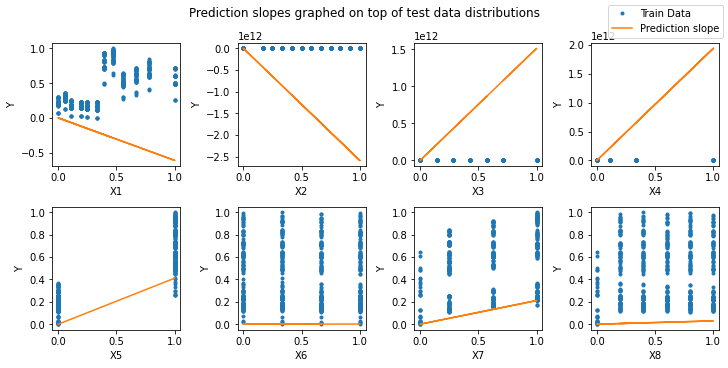

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=2, constrained_layout=True, figsize=(10,5))
slopes = lin_Y1.w[0:-1]
fig.suptitle("Prediction slopes graphed on top of test data distributions")
for ax, col, slope in zip(axes.flat, X, slopes):
    line_a, = ax.plot(X[col], trainData[["Y1"]], '.')
    line_b,  = ax.plot(X[col], slope*X[col], '-')
    ax.set_xlabel('{axe}'.format(axe=col))
    ax.set_ylabel('Y')
fig.legend((line_a, line_b), ('Train Data', 'Prediction slope'))

### Compare with Sklearn's version

In [ ]:
from sklearn.linear_model import LinearRegression as linreg

ln = linreg()

ln.fit(X, Y1)
modPred = ln.predict(testX_Y1)
ln.coef_

array([[-6.11555297e-01, -9.01473640e+12,  5.25859623e+12,
         6.76105230e+12,  4.15527344e-01, -4.68063354e-03,
         2.23337173e-01,  5.82847595e-02]])

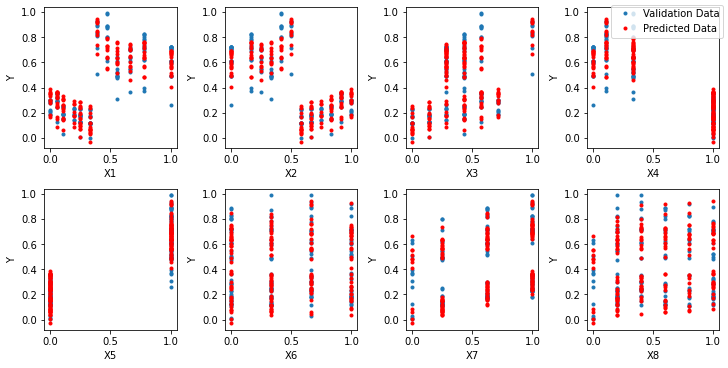

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=2, constrained_layout=True, figsize=(10,5))
slopes = ln.coef_
for ax, col, slope in zip(axes.flat, testX_Y1, slopes.flat):
    line_a, = ax.plot(testX_Y1[col], testData[["Y1"]], '.')
    line_b, = ax.plot(testX_Y1[col], modPred, '.', color='r')
    ax.set_xlabel('{axe}'.format(axe=col))
    ax.set_ylabel('Y')
fig.legend((line_a, line_b), ('Validation Data', 'Predicted Data'))

# Minibatch SGD Linear Regression

## Implementation

In [ ]:
class MiniBatch_SGD_LinearRegression:
    def __init__(self, add_bias=True, batch_size=32, epochs=15, record_history=True):
        self.add_bias = add_bias
        self.batch_size = batch_size
        self.epochs = epochs
        self.record_history = record_history
        if self.record_history:
            self.cost_history = []
        pass
    
    def fit(self, x, y, optimizer, create_mini_batches):
        if x.ndim == 1:
            x = x[:, None]
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        N, D = x.shape
        def gradient(x, y, w):
            yh = x @ w
            N, D = x.shape
            grad = .5*np.dot(x.T, yh - y)/N
            np.set_printoptions(suppress=True)
            return grad
        self.w = np.zeros((x.shape[1], 1))
        max_iters = self.epochs
        # Loop over all data for the number of epochs
        currEpoch = 0
        for itr in range(max_iters):
            mini_batches = create_mini_batches(x, y, self.batch_size)
            # For each mini batch, run SGD
            for mini_batch in mini_batches:
                x_mini, y_mini = mini_batch
                self.w = optimizer.run(gradient, x_mini, y_mini, self.w)
                if self.record_history:
                    cost = .5*np.mean((np.dot(x,self.w) - y)**2, axis=None)
                    self.cost_history.append(float(cost.to_string(index=False)))
            
            
            # print('Epoch {0}, batches: {1}'.format(itr, len(mini_batches)))
            
        return self
    
    def predict(self, x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh

In [ ]:
class GradientDescent:
    
    def __init__(self, learning_rate=1e-6, max_iters=1e3, epsilon=1e-8, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.num = 0
            self.w_history = []                 #to store the weight history for visualization
            self.num_history = []               #to store the iteration history for visualization
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w)               # compute the gradient with present weight
            w = w - self.learning_rate * grad         # weight update step
            if self.record_history:
                self.w_history.append(w)
                self.num_history.append(self.num)
                self.num += 1
            t += 1
        return w


In [ ]:
def create_mini_batches(x, y, batch_size):
    mini_batches = []
    data = np.hstack((x,y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
    
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i+1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

## Run

Fit model with normalized data

Save gradients and costs for plotting

In [ ]:
w_histories = []
costs = []
descriptions = []

In [ ]:
sgd_Y1 = MiniBatch_SGD_LinearRegression(batch_size=16, epochs=2)
grad_Y1 = GradientDescent(max_iters=15, learning_rate=1e-2, record_history=True, epsilon=1e-8)
sgd_Y1.fit(X, Y1, grad_Y1, create_mini_batches)
w_histories.append(grad_Y1.w_history)
costs.append(sgd_Y1.cost_history)
descriptions.append('Minibatch SGD on Y1 normalized')

In [ ]:
sgd_Y2 = MiniBatch_SGD_LinearRegression(batch_size=16, epochs=2)
grad_Y2 = GradientDescent(max_iters=15, learning_rate=1e-2, record_history=True, epsilon=1e-8)
sgd_Y2.fit(X, Y2, grad_Y2, create_mini_batches)
w_histories.append(grad_Y2.w_history)
costs.append(sgd_Y2.cost_history)
descriptions.append('Minibatch SGD on Y2 normalized')

Run with k best

In [ ]:
w_histories_k_best = []
costs_k_best = []
descriptions_k_best = []

In [ ]:
sgd_k_best_Y1 = MiniBatch_SGD_LinearRegression(batch_size=16,epochs=2)
grad_k_best_Y1 = GradientDescent(max_iters=15, learning_rate=1e-2, record_history=True, epsilon=1e-8)
sgd_k_best_Y1.fit(k_best_X_Y1, k_best_Y1, grad_k_best_Y1, create_mini_batches)
w_histories_k_best.append(grad_k_best_Y1.w_history)
costs_k_best.append(sgd_k_best_Y1.cost_history)
descriptions_k_best.append('Minibatch SGD on K best\nparameters for Y1 normalized')

In [ ]:
sgd_k_best_Y2 = MiniBatch_SGD_LinearRegression(batch_size=16,epochs=2)
grad_k_best_Y2 = GradientDescent(max_iters=15, learning_rate=1e-2, record_history=True, epsilon=1e-8)
sgd_k_best_Y2.fit(k_best_X_Y2, k_best_Y2, grad_k_best_Y2, create_mini_batches)
w_histories_k_best.append(grad_k_best_Y2.w_history)
costs_k_best.append(sgd_k_best_Y2.cost_history)
descriptions_k_best.append('Minibatch SGD on K best\nparameters for Y2 normalized')

Run with raw data

In [ ]:
w_histories_raw = []
costs_raw = []
descriptions_raw = []

In [ ]:
sgd_raw_Y1 = MiniBatch_SGD_LinearRegression(batch_size=16, epochs=2)
grad_raw_Y1 = GradientDescent(max_iters=2, learning_rate=1e-4, record_history=True, epsilon=1e-8)
sgd_raw_Y1.fit(X_raw, Y1_raw, grad_raw_Y1, create_mini_batches)
w_histories_raw.append(grad_raw_Y1.w_history)
costs_raw.append(sgd_raw_Y1.cost_history)
descriptions_raw.append('Minibatch SGD on raw parameters for Y1')

In [ ]:
sgd_raw_Y2 = MiniBatch_SGD_LinearRegression(batch_size=16, epochs=2)
grad_raw_Y2 = GradientDescent(max_iters=2, learning_rate=1e-4, record_history=True, epsilon=1e-8)
sgd_raw_Y2.fit(X_raw, Y2_raw, grad_raw_Y2, create_mini_batches)
w_histories_raw.append(grad_raw_Y2.w_history)
costs_raw.append(sgd_raw_Y2.cost_history)
descriptions_raw.append('Minibatch SGD on raw parameters for Y2')

In [ ]:
w_hists_list = [w_histories, w_histories_k_best, w_histories_raw]
costs_list = [costs, costs_k_best, costs_raw]
descriptions_list = [descriptions, descriptions_k_best, descriptions_raw]

## Plotting

In [ ]:
from matplotlib.pyplot import cm

def plotGradients(w_histories_grad, cost_histories_batch, descriptions):
    
    # w_histories_grad is an array of w_history_grad
    # w_history_grad are arrays of gradients
    # gradients are array of numbers
    
    num_of_params = len(w_histories_grad[0][0])
    num_rows = 2
    num_cols = num_of_params // num_rows
    fig_w, axes_w = plt.subplots(ncols=num_cols, nrows=num_rows, constrained_layout=True, figsize=(10,5))
    fig_w.suptitle('Weights over iterations in gradient descent', x=0.25)
    
    fig_cost, axes_cost = plt.subplots(ncols=2, nrows=1, constrained_layout=True)
    fig_cost.suptitle('Cost values over batch iterations', x=0.25)
    
    if not len(w_histories_grad) == len(cost_histories_batch):
        raise Exception('History lists must be of same length (same number of minibatches)')
    
    colors = cm.rainbow(np.linspace(0.2, 1, len(w_histories_grad)))
    colorLines = []
    
    # 1 color per gradient graph
    for w_history_grad, cost_history_batch, color in zip(w_histories_grad, cost_histories_batch, colors):
        w_over_time_grad = np.array(w_history_grad)
        cost_over_time_batch= np.array(cost_history_batch)
        graphNum = 0
        last_line = 0 # used to store last line and save at then of loop
        for ax in axes_cost.flat:
            nums = np.arange(1, len(cost_over_time_batch) + 1)
            line, = ax.plot(nums, cost_over_time_batch, color=color)
            ax.set_xlabel('number of batches run')
            graphNum += 1
            ax.set_ylabel('cost'.format(axe=graphNum))
        
        graphNum = 0
        hist_num = 0
        for ax, w in zip(axes_w.flat, w_over_time_grad.T[0]):
            nums = np.arange(1, len(w) + 1)
            last_line, = ax.plot(nums, w, color=color)
            ax.set_xlabel('number of iterations')
            graphNum += 1
            ax.set_ylabel('w{axe} gradient'.format(axe=graphNum))
            hist_num += 1
            
        colorLines.append(last_line)
            
    fig_w.legend(colorLines, descriptions)
    fig_cost.legend(colorLines, descriptions)

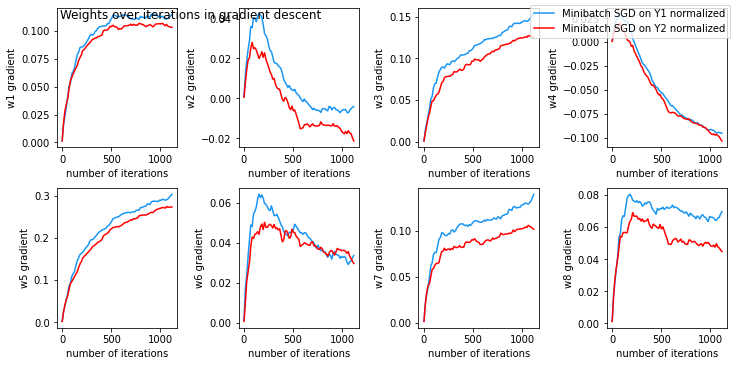

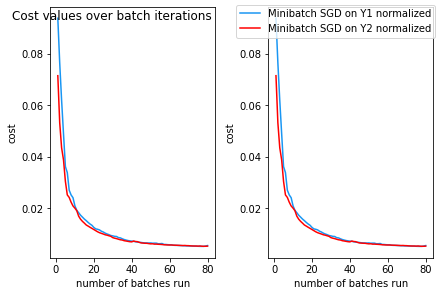

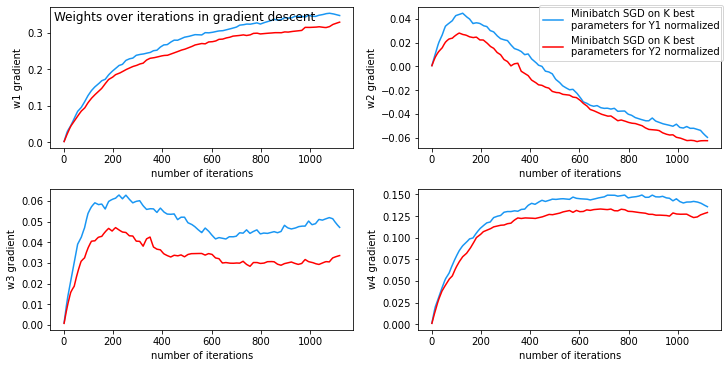

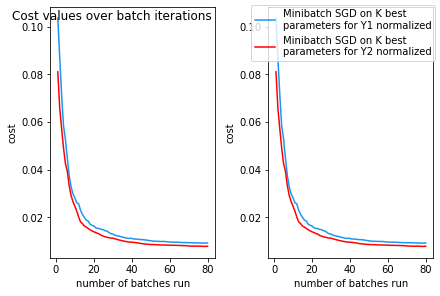

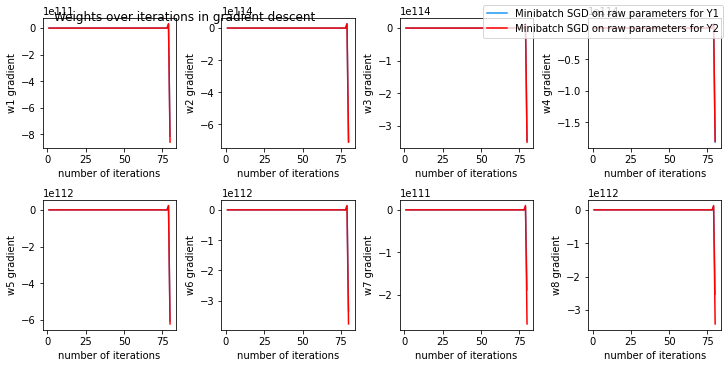

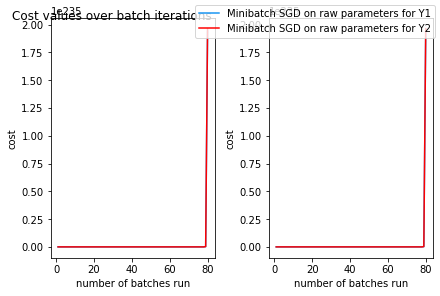

In [ ]:
for hist, cost, desc in zip(w_hists_list, costs_list, descriptions_list):
    plotGradients(hist, cost, desc)

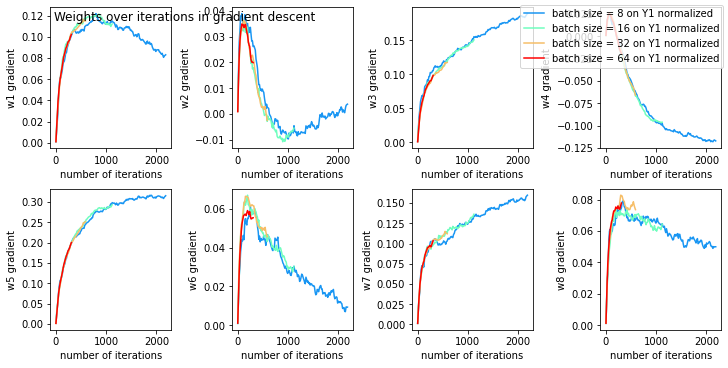

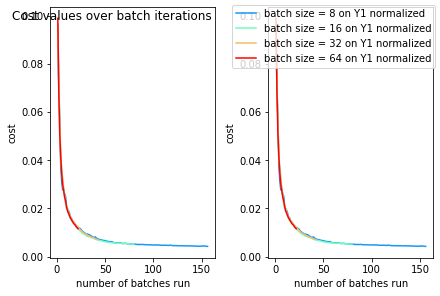

In [ ]:
batchSizes = [8,16,32,64]

grads = []
costs = []
descriptions = []
for batchsize in batchSizes:
    sgd = MiniBatch_SGD_LinearRegression(batch_size=batchsize, epochs=2)
    grad = GradientDescent(max_iters=15, learning_rate=1e-2, record_history=True, epsilon=1e-8)
    sgd.fit(X, Y1, grad, create_mini_batches)
    grads.append(grad.w_history)
    costs.append(sgd.cost_history)
    descriptions.append('batch size = {0} on Y1 normalized'.format(batchsize))
    

plotGradients(grads, costs, descriptions)

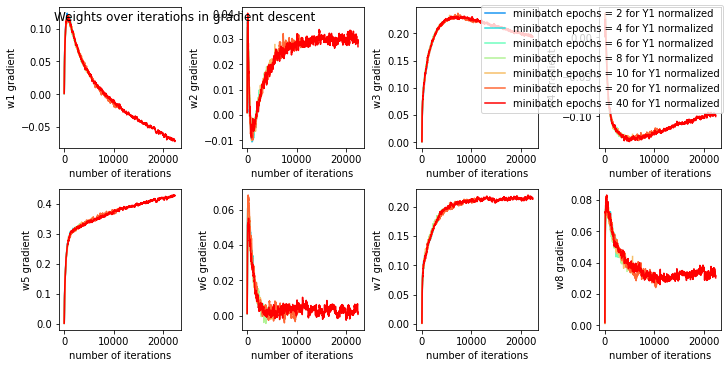

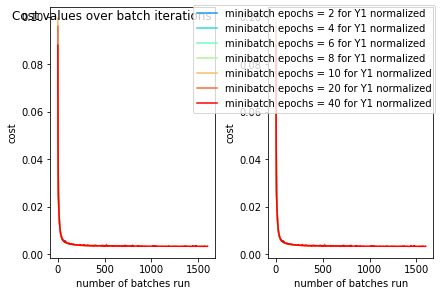

In [ ]:
epochs = [2,4,6,8,10,20,40]

grads = []
costs = []
descriptions = []
for epoch in epochs:
    sgd = MiniBatch_SGD_LinearRegression(batch_size=16, epochs=epoch)
    grad = GradientDescent(max_iters=15, learning_rate=1e-2, record_history=True, epsilon=1e-8)
    sgd.fit(X, Y1, grad, create_mini_batches)
    costs.append(sgd.cost_history)
    grads.append(grad.w_history)
    descriptions.append('minibatch epochs = {0} for Y1 normalized'.format(epoch))
    

plotGradients(grads, costs, descriptions)

## Results/Testing

In [ ]:
predictions = sgd.predict(testX_Y1)

In [ ]:
errorMiniSGD = sse(predictions, testData[["Y1"]])
errorMiniSGD

Y1    0.002901
dtype: float64

# Compare

In [ ]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
print(lin_Y1.w)

[[-0.611555]
 [-2587765723082.094727]
 [1509530005131.120361]
 [1940824292311.091797]
 [0.410889]
 [0.001343]
 [0.211060]
 [0.029419]
 [-431294287179.681152]]


In [ ]:
print(sgd_Y1.w)

[[0.114813]
 [-0.004094]
 [0.153585]
 [-0.095416]
 [0.302947]
 [0.033727]
 [0.139701]
 [0.069649]
 [0.132740]]


In [ ]:
print('Linear Regression error: {0}, Minibatch SGD Linear Regression error: {1}'.format(error_lin_Y1.to_string(), errorMiniSGD.to_string()))

Linear Regression error: Y1    0.00269, Minibatch SGD Linear Regression error: Y1    0.002901
